In [1]:
##importing libraries
#data manipulation
import pandas as pd
import numpy as np
import re
import string

##Machine learning and text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from wordcloud import WordCloud

#libraries used for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
#importing the csv file
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dftrain=pd.read_csv(r"malignant_comments_clf_train_csv")
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
dftrain.shape

(159571, 8)

In [5]:
# Creating the new column for comments_length
dftrain['comments_length'] = dftrain['comment_text'].str.len()
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


In [6]:
dftrain['comment_text'] = dftrain['comment_text'].str.lower()#lower case
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')#remove email address
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'web')#remove webaddress
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'£|\$|₹', 'signs')#remove signs
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'ph_number')#remove phonenumber
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')#remove numbers
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'[^\w\d\s]', ' ')#remove punctuation
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'\s+', ' ')#remove spaces
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [7]:
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67
5,00025465d4725e87,congratulations from me as well use the tools ...,0,0,0,0,0,0,65
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0,44
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


In [8]:
#Removing Stop_Words
stop_words = set(stopwords.words('english') + ['u','ur','im','doin','i','so', 'ü', 'â', 'ur', '4', '2', 'dont', 'doin', 'ure','READ MORE','read'])
dftrain['comment_text'] = dftrain['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67
5,00025465d4725e87,congratulations well use tools well talk,0,0,0,0,0,0,65
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70


In [9]:
# Creating new column for cleaned comment length
dftrain['cleaned_com_text'] = dftrain["comment_text"].str.len()
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length,cleaned_com_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,97
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29
5,00025465d4725e87,congratulations well use tools well talk,0,0,0,0,0,0,65,40
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472,293
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36


In [10]:
dftrain['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [11]:
dftrain['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [12]:
dftrain['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [13]:
dftrain['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [14]:
dftrain['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [15]:
dftrain['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

malignant
0    144277
1     15294
Name: malignant, dtype: int64


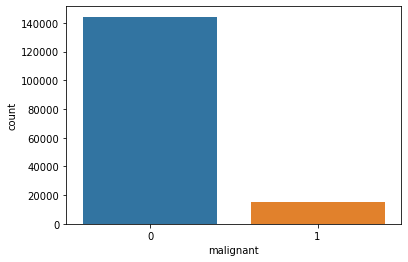

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


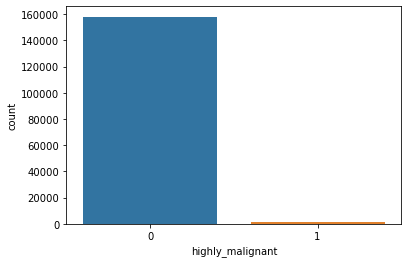

loathe
0    158166
1      1405
Name: loathe, dtype: int64


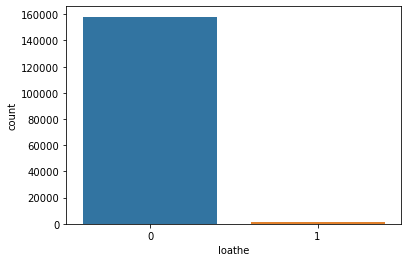

rude
0    151122
1      8449
Name: rude, dtype: int64


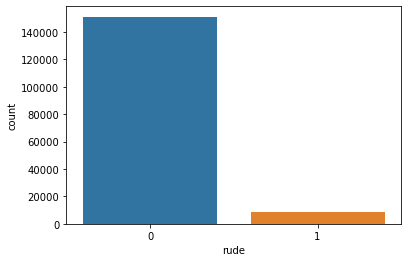

abuse
0    151694
1      7877
Name: abuse, dtype: int64


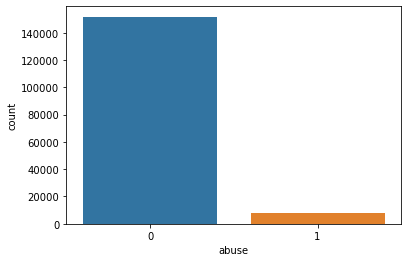

threat
0    159093
1       478
Name: threat, dtype: int64


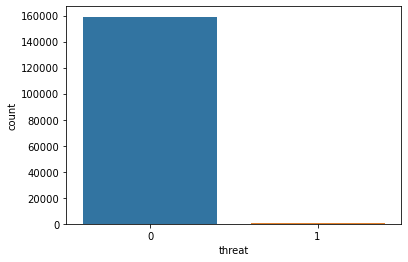

In [16]:
target = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in target: 
    print(i)
    print(dftrain[i].value_counts())
    sns.countplot(dftrain[i])
    plt.show()

In [17]:
#Lemmetizing
WL = WordNetLemmatizer()
dftrain['comment_text'] = dftrain['comment_text'].apply(lambda x: ' '.join(WL.lemmatize(i) for i in x.split()))
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length,cleaned_com_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,97
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29
5,00025465d4725e87,congratulation well use tool well talk,0,0,0,0,0,0,65,40
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472,293
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36


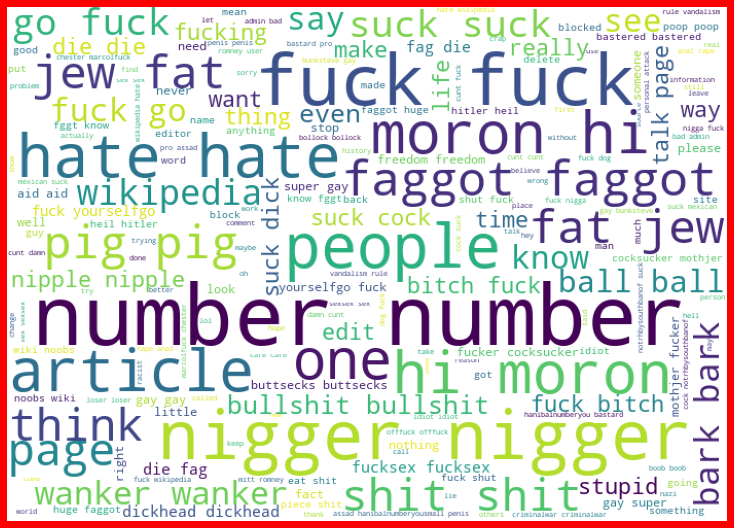

In [18]:
#Getting sense of words in malignant
plot = dftrain['comment_text'][dftrain['malignant']==1]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

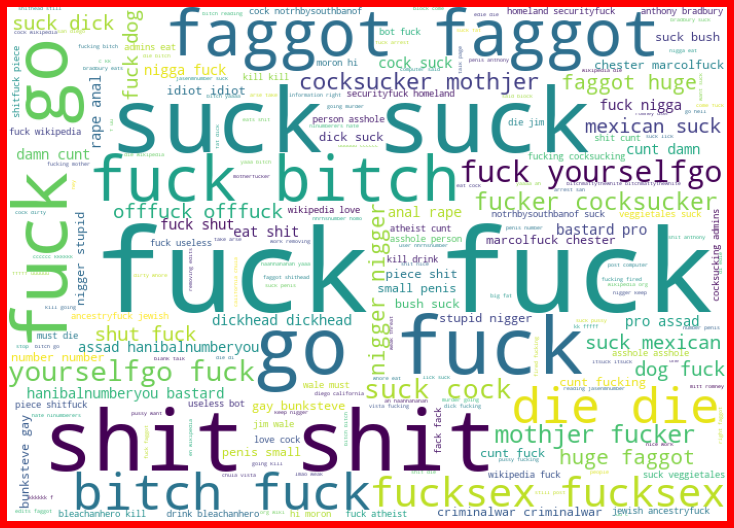

In [19]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['highly_malignant']==1]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

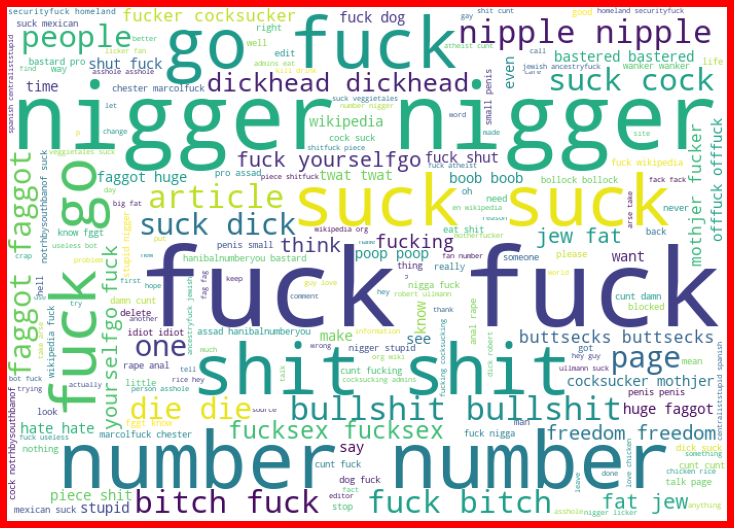

In [20]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['rude']==1]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

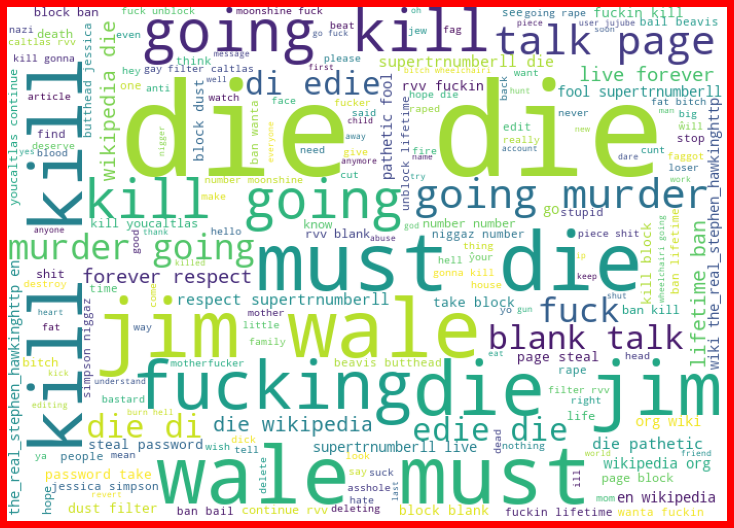

In [21]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['threat']==1]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

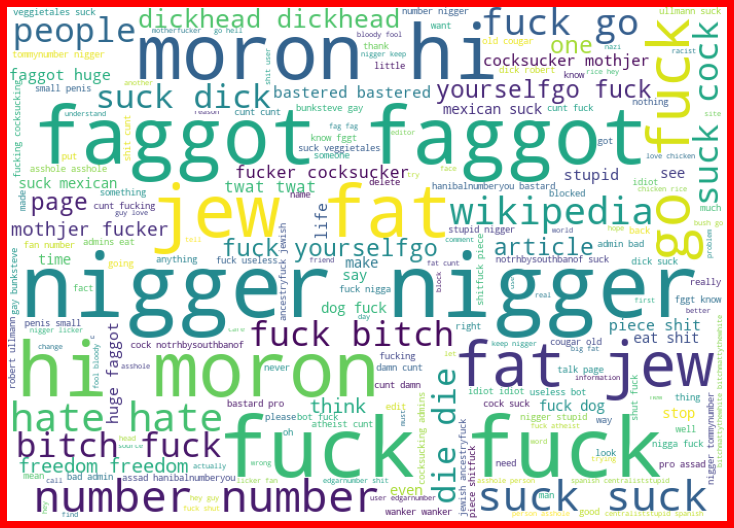

In [22]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['abuse']==1]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

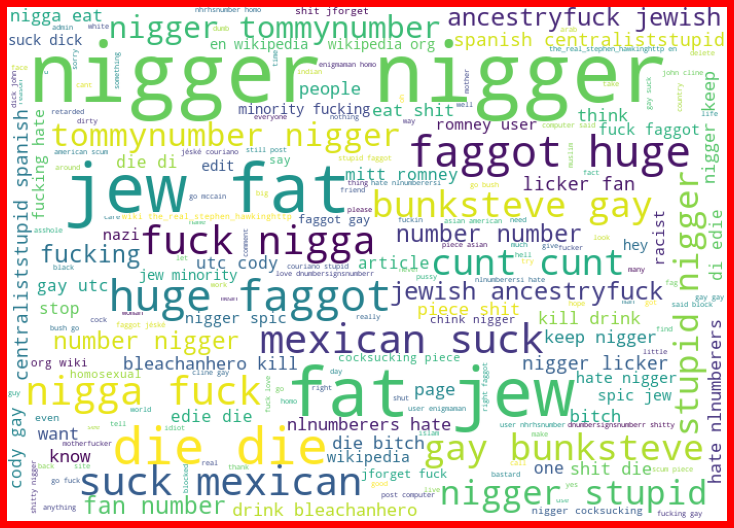

In [23]:
#Getting sense of words in highly_malignant
plot = dftrain['comment_text'][dftrain['loathe']==1]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
dftrain[target].sum()

malignant           15294
highly_malignant     1595
loathe               1405
rude                 8449
abuse                7877
threat                478
dtype: int64

In [25]:
#adding a column representing the comments with all the target characterstics
dftrain["Target"] = dftrain[target].sum(axis=1)
dftrain.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comments_length,cleaned_com_text,Target
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172,0
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,97,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,374,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29,0
5,00025465d4725e87,congratulation well use tool well talk,0,0,0,0,0,0,65,40,0
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27,4
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57,0
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472,293,0
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36,0


In [26]:
dftrain["Target"].unique()

array([0, 4, 1, 3, 2, 5, 6], dtype=int64)

In [27]:
for i in range(0,7): 
    print(f'For value: {i}')
    print((dftrain["Target"]==(i)).sum())
    print("-----------------------")

For value: 0
143346
-----------------------
For value: 1
6360
-----------------------
For value: 2
3480
-----------------------
For value: 3
4209
-----------------------
For value: 4
1760
-----------------------
For value: 5
385
-----------------------
For value: 6
31
-----------------------


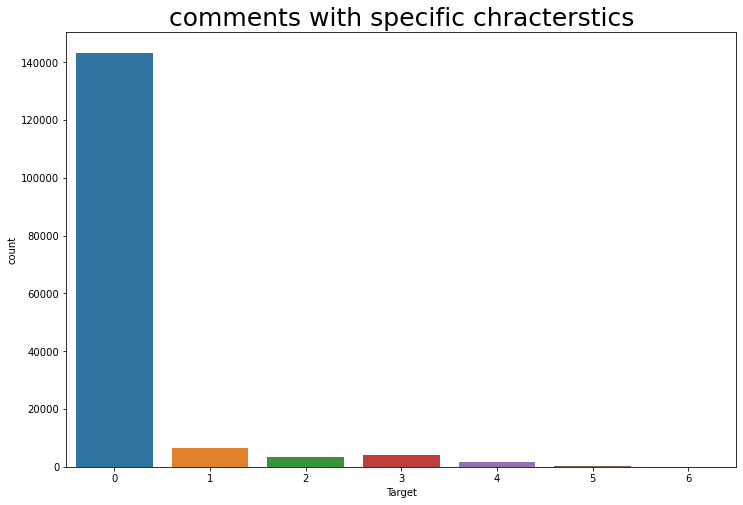

In [28]:
#comments with all the chracterstics
plt.figure(figsize=(12,8))
sns.countplot(dftrain["Target"])
plt.title("comments with specific chracterstics",fontsize=25)
plt.show()

# Feature Extraction

In [29]:
tfidf = TfidfVectorizer(max_features = 15000, ngram_range = (1,5), analyzer = 'char')

In [30]:
x = tfidf.fit_transform(dftrain['comment_text'])
y = dftrain['Target']

In [52]:
#Creating train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [53]:
x.shape, y.shape

((159571, 15000), (159571,))

In [54]:
x_train.shape, y_train.shape

((127656, 15000), (127656,))

# MODEL BUILIDING :

In [55]:
#Importing all the model library
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [56]:
SVC= LinearSVC(random_state=0)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [57]:
models= []
models.append(('SVC',SVC))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

In [ ]:
Model= []
score= []
cvs=[]
for name,model in models:

    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    score.append(AS*100)
    sc= cross_val_score(model, x, y, cv=3, scoring='accuracy').mean()
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')

LinearSVC(random_state=0)


classification_report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     28671
           1       0.31      0.14      0.19      1220
           2       0.36      0.11      0.16       730
           3       0.48      0.50      0.49       856
           4       0.35      0.22      0.27       365
           5       0.30      0.10      0.15        72
           6       0.00      0.00      0.00         1

    accuracy                           0.92     31915
   macro avg       0.39      0.29      0.32     31915
weighted avg       0.89      0.92      0.90     31915



RandomForestClassifier()


classification_report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28671
           1       0.24      0.04      0.06      1220
           2       0.43      0.09      0.15       730
           3       0.46      0.59      0.52       856
           4       0.48      

In [ ]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result